In [14]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

dirname = os.path.join(os.getcwd(), 'Dataset/Entrenamiento')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

etapas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    etapas.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

INIT_LR = 1e-3
epochs = 40
batch_size = 32

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(200,200,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(200,200,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5)) 
model.add(Dense(nClasses, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

train_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
model.save("Modelo/model_2.h5py")

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

leyendo imagenes de  C:\Users\Administrador\Desktop\DatasetNuevo\Dataset/Entrenamiento\
C:\Users\Administrador\Desktop\DatasetNuevo\Dataset/Entrenamiento\Critica 1
C:\Users\Administrador\Desktop\DatasetNuevo\Dataset/Entrenamiento\Leve 480
C:\Users\Administrador\Desktop\DatasetNuevo\Dataset/Entrenamiento\Sana 480
Directorios leidos: 3
Imagenes en cada directorio [481, 480, 480]
suma Total de imagenes en subdirs: 1441
Cantidad etiquetas creadas:  1441
0 Critica
1 Leve
2 Sana
Total number of outputs :  3
Output classes :  [0 1 2]
Training data shape :  (1152, 200, 200, 3) (1152,)
Testing data shape :  (289, 200, 200, 3) (289,)
Original label: 2
After conversion to one-hot: [0. 0. 1.]
(921, 200, 200, 3) (231, 200, 200, 3) (921, 3) (231, 3)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
__________________________________

INFO:tensorflow:Assets written to: Modelo/model_2.h5py\assets
10/10 [==============================] - 3s 324ms/step - loss: 0.3347 - accuracy: 0.8651
Test loss: 0.3347010910511017
Test accuracy: 0.8650519251823425


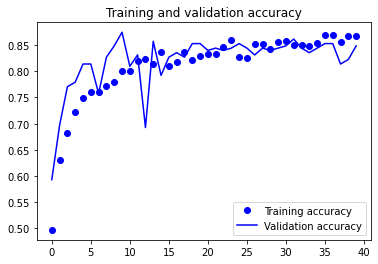

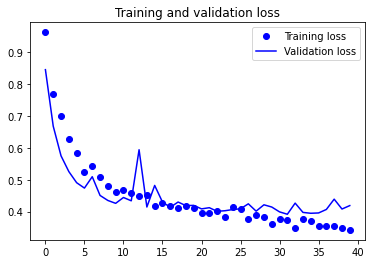

In [15]:
accuracy = train_dropout.history['accuracy']
val_accuracy = train_dropout.history['val_accuracy']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
predicted_classes2 = model.predict(test_X)
predicted_classes=[]
for predicted_etapas in predicted_classes2:
    predicted_classes.append(predicted_etapas.tolist().index(max(predicted_etapas)))
predicted_classes=np.array(predicted_classes)
predicted_classes.shape, test_Y.shape

((289,), (289,))

Found 250 correct labels


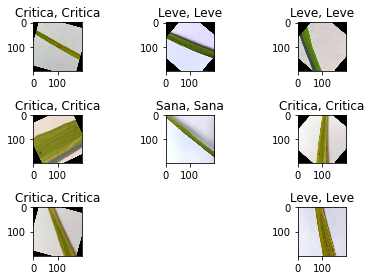

In [17]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(200,200,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(etapas[predicted_classes[correct]],
                                                    etapas[test_Y[correct]]))

    plt.tight_layout()

Found 39 incorrect labels


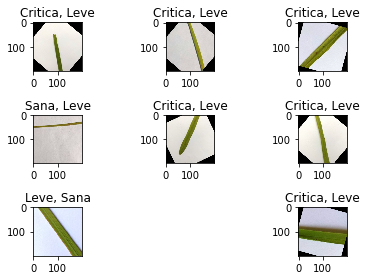

In [18]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(200,200,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(etapas[predicted_classes[incorrect]],
                                                    etapas[test_Y[incorrect]]))
    plt.tight_layout()

In [19]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.95      0.86        94
     Class 1       0.84      0.71      0.77        92
     Class 2       0.96      0.93      0.95       103

    accuracy                           0.87       289
   macro avg       0.87      0.86      0.86       289
weighted avg       0.87      0.87      0.86       289



In [20]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['Extras/Leve/L (31693).jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (200, 200),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], etapas[img_tagged.tolist().index(max(img_tagged))])

Extras/Leve/L (31693).jpg Critica
